In [25]:
import numpy as np
import sklearn.datasets
import sklearn.model_selection
import sklearn.metrics
import sklearn.decomposition
import sklearn.discriminant_analysis
import sklearn.manifold
import scipy.misc
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from mlfund.plot import Plot2D
from mlfund.plot import Plot3D

%matplotlib inline

In [2]:
mnist = sklearn.datasets.fetch_mldata('MNIST original')

print(mnist.data.shape)
print(np.unique(mnist.target))

(70000, 784)
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9.]


6876


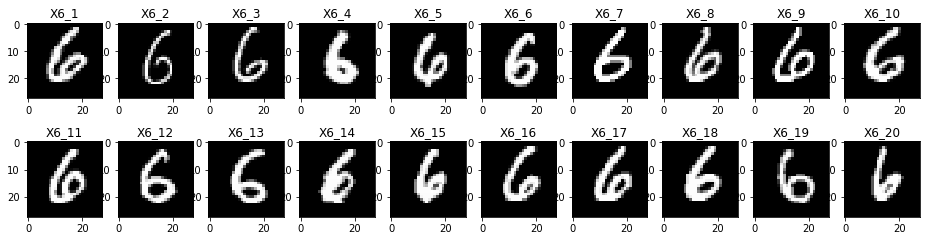

In [3]:
X6 = mnist.data[mnist.target == 6]
print(len(X6))

plt.figure(figsize=(16, 4))
for i in range(0, 20):
    plt.subplot(2, 10, i+1)
    plt.imshow(X6[i, :].reshape((28,28)), cmap='gray')
    
    plt.title("X6_%d" % (i + 1))

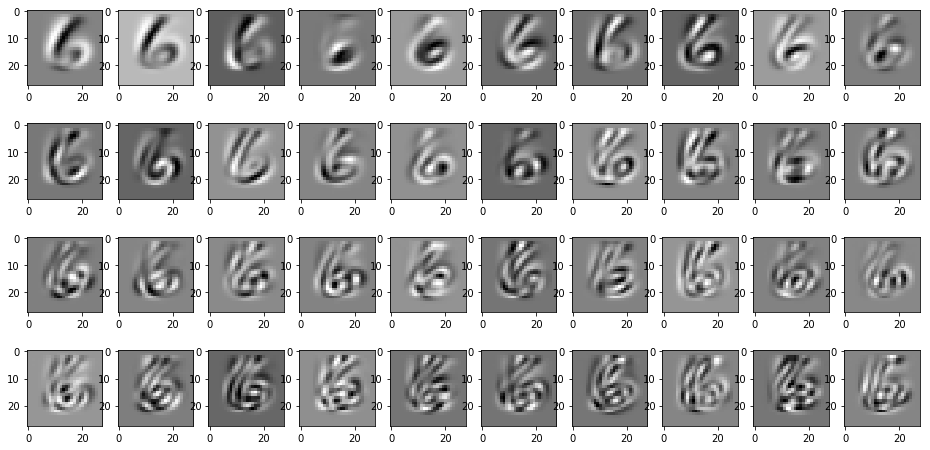

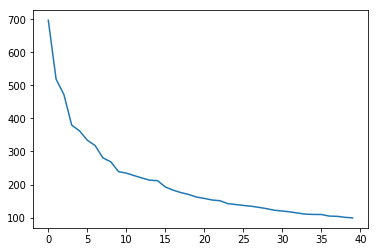

In [4]:
n_components=40

pca = sklearn.decomposition.PCA(n_components=n_components)
pca.fit( X6 )
X6_r = pca.transform( X6 )

plt.figure(figsize=(16, 8))
for i in range(0, n_components):
    plt.subplot(n_components/10, 10, i+1)
    plt.imshow(pca.components_[i, :].reshape((28,28)), cmap='gray')

plt.figure()
plt.plot(np.sqrt(pca.explained_variance_))

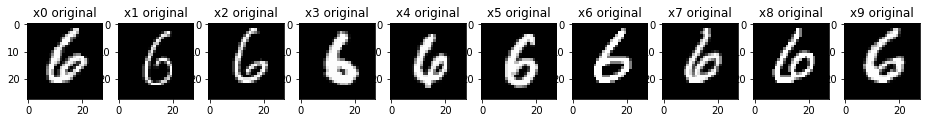

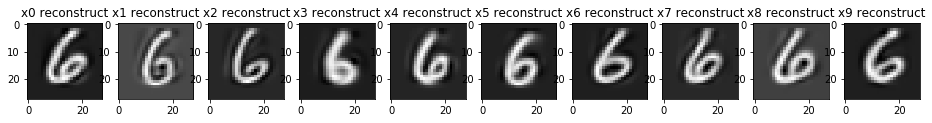

In [5]:
X6_recon = pca.inverse_transform(X6_r)

plt.figure(figsize=(16, 4))
for i in range(0, 10):
    plt.subplot(2, 10, i+1)
    plt.imshow(X6[i, :].reshape((28,28)), cmap='gray')
    plt.title('x%d original' % i)
    
plt.figure(figsize=(16, 4))
for i in range(0, 10):
    plt.subplot(2, 10, i+1)
    plt.imshow(X6_recon[i, :].reshape((28,28)), cmap='gray')
    plt.title('x%d reconstruct' % i)


In [20]:
n_components=40

X = mnist.data
y = mnist.target
idx = np.random.choice(a=[False, True], size=len(X), p=[0.95, 0.05])
X = X[idx, :]
y = y[idx]

pca = sklearn.decomposition.PCA(n_components=n_components)
pca.fit( X )
X_r = pca.transform( X )

E:\Project\Jessee-github\tu-etp-ad1062\mlfund\plot.py:63: UserWarning: Dimension of samples exceeds 3, only plot the first-3 dimension
  warnings.warn("Dimension of samples exceeds 3, only plot the first-3 dimension")


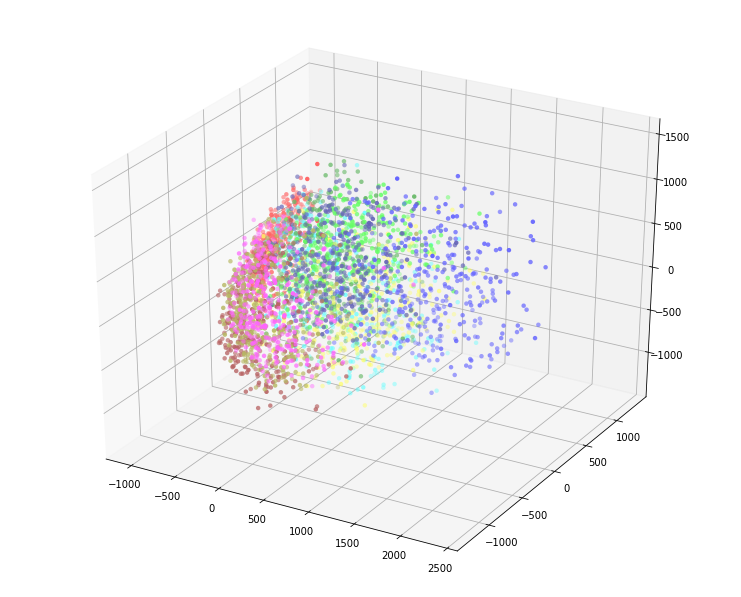

In [21]:
plot = Plot3D()
plot.scatter(X_r, y)
plot.title('PCA')
plot.show()

In [22]:
lda = sklearn.discriminant_analysis.LinearDiscriminantAnalysis()
lda.fit(X, y)


C:\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

E:\Project\Jessee-github\tu-etp-ad1062\mlfund\plot.py:63: UserWarning: Dimension of samples exceeds 3, only plot the first-3 dimension
  warnings.warn("Dimension of samples exceeds 3, only plot the first-3 dimension")


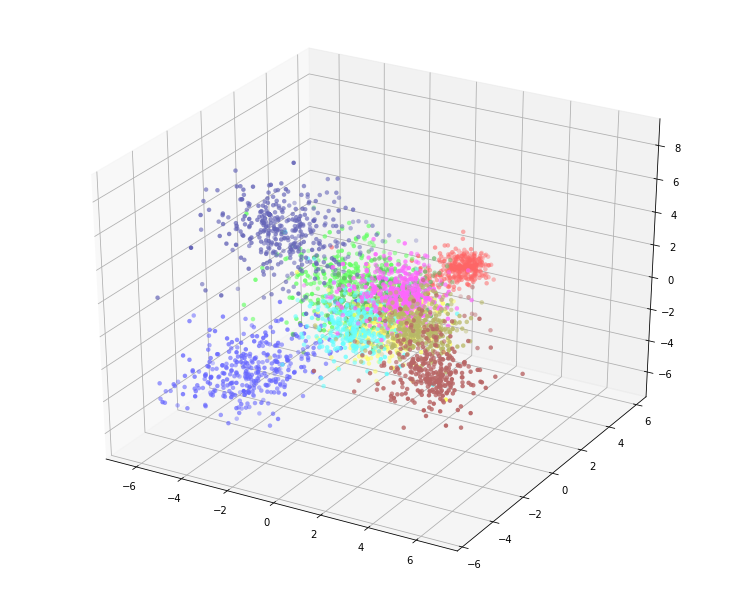

In [23]:
X_r = lda.transform(X)

plot = Plot3D()
plot.scatter(X_r, y)
plot.title('LDA')
plot.show()


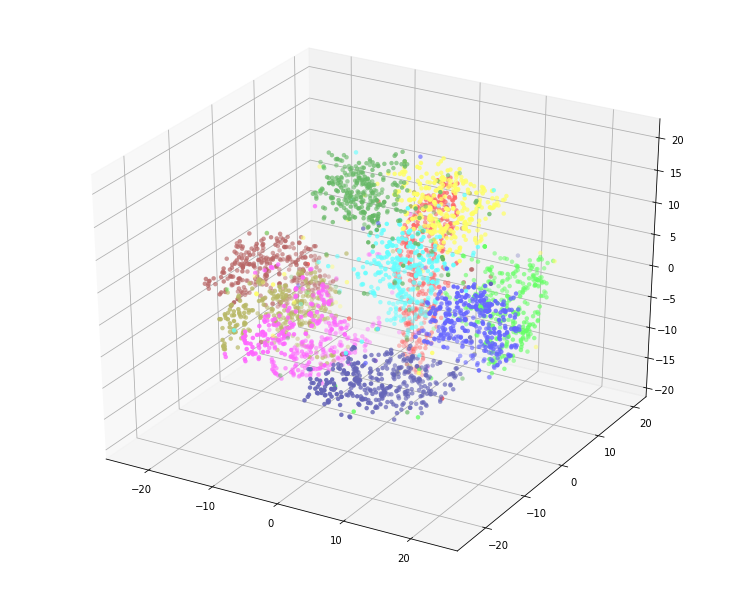

In [32]:
tSNE = sklearn.manifold.TSNE(n_components=3)
X_r = tSNE.fit_transform(X) 

plot = Plot3D()
plot.scatter(X_r, y)
plot.show()